## hw8pr2: &nbsp; Embeddings: computing with word _meanings_

About a decade ago, the computing community proposed a representation of the _meaning_ of words as _embeddings_.

Embeddings are large vectors of weights that capture a word's use in context. They can be created by training a neural network to "predict the missing word" (from lots of possible contexts where it appears). 

Here, you will try out the original word-embeddings, called Word2Vec. 

In [177]:
#
# hw8pr2.py ~ cs35 ~ Word Embeddings: Computing with word _meanings_
#

# our usual libraries
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

### Gensim is a library for word-meanings

Most often, the _meaning_ of a word is a vector, or ***embedding*** that has been learned through a neural net:
+ that net is trained to determine each word from its context
+ many variations are now used
+ here, we use the original embeddings -- which better illustrate many of their weaknesses! 
+ from the word2vec paper: https://arxiv.org/abs/1301.3781

In [178]:
# Most important for hw8 is gensim, the word-embedding (word2vec) library
# See if you already have it installed:
import gensim

# if not, try         
# !pip install gensim

In [179]:
import scipy
import gensim

print("scipy:", scipy.__version__)
print("gensim:", gensim.__version__)

scipy: 1.10.1
gensim: 4.3.2


In [180]:
# !pip install gensim

In [181]:
# The word-embeddings are in the large file word2vec_model.txt

# Make sure that file is here:
%ls

Lec_8_cs35_spr25_90pp.pdf               hw8pr2word_embeddings.ipynb
hw8pr0final_project_explorations.ipynb  hw8ss0.jpeg
hw8pr1digits_dreamer.ipynb              word2vec_model.txt


In [182]:
#
# This function, read_word2vec_model, wraps the creation of a gensim model, let's say, m
#
#      To use it, run the line   m = read_word2vec_model()
#

from gensim.models import KeyedVectors

def read_word2vec_model(filename = "word2vec_model.txt"):  
    """ a function that reads a word2vec model from the file
        "word2vec_model.txt" and returns a model object that
        we will usually name m or model...
    """
    try:
        print("Starting to load the model in ", filename, "...")
        model = KeyedVectors.load_word2vec_format(filename, binary=False)
        print("Model loaded.\n")
    except FileNotFoundError as e:
        print(f"  [WARNING]    The file {filename} was not found.     [WARNING]  ")
        return None   # returning a placeholder, not a model

    # let's print some attributes
    print("The model built is", model, "\n")
    print("The vocabulary has", model.vectors.shape[0], "words")   # The vocabulary has 43981 words
    print("Each word is a vector of size", model.vector_size)  # 300
    print("\nTry m.get_vector('python') to see a the vector for 'python'!")
    print("m is dictionary-like, e.g., try 'python' in m\n")
    model.fill_norms()  # freezes the model, m, as-is (no more training)
    # we weren't going to train more, so no worries (in week7, at least)
    return model


In [183]:
# 
# best to run this only once... or once in a while, as needed
#

m = read_word2vec_model()

Starting to load the model in  word2vec_model.txt ...
Model loaded.

The model built is KeyedVectors<vector_size=300, 43981 keys> 

The vocabulary has 43981 words
Each word is a vector of size 300

Try m.get_vector('python') to see a the vector for 'python'!
m is dictionary-like, e.g., try 'python' in m



In [184]:
print(f"m is {m}")   # let's see how it prints...

m is KeyedVectors<vector_size=300, 43981 keys>


In [185]:
'python' in m

True

In [186]:
m.get_vector('python')

array([ 0.0731009 ,  0.0326895 , -0.107592  ,  0.041441  , -0.0519943 ,
       -0.0310164 ,  0.017503  ,  0.0218788 , -0.0777341 ,  0.0756749 ,
       -0.0122264 , -0.143113  , -0.0212353 , -0.0253537 , -0.0620328 ,
       -0.0767045 ,  0.044015  ,  0.0208492 , -0.0689826 , -0.00855847,
       -0.0229084 , -0.0561127 ,  0.0509647 ,  0.080308  ,  0.0126125 ,
       -0.00868717, -0.102444  ,  0.0648642 ,  0.152379  , -0.0823672 ,
       -0.010682  ,  0.0885448 , -0.00669234, -0.0432428 , -0.0240667 ,
        0.0329469 , -0.0178891 ,  0.0607458 , -0.00242919,  0.0998703 ,
       -0.0113255 , -0.00701408,  0.0240667 ,  0.0870004 , -0.00727148,
       -0.0664086 ,  0.0383522 ,  0.0169882 ,  0.0365505 , -0.01879   ,
        0.010682  ,  0.0013996 ,  0.148261  , -0.0736157 ,  0.0638346 ,
       -0.0517369 ,  0.0844264 , -0.0432428 ,  0.0684678 ,  0.0355209 ,
        0.0684678 , -0.0169882 , -0.0253537 , -0.017503  , -0.0700121 ,
        0.0119046 , -0.0176317 , -0.0664086 , -0.047876  , -0.00

#### Let's see the "meaning" (the vector or embedding) for 'queen':

First, we'll make sure 'queen' is in the model, <tt>m</tt>

In [187]:
'queen' in m

True

In [188]:
m.get_vector('queen')

array([ 0.00173332, -0.0474043 , -0.022896  ,  0.0407935 ,  0.0435346 ,
       -0.0293455 , -0.0235409 , -0.0715902 , -0.0651406 ,  0.0183813 ,
       -0.0249921 , -0.125767  ,  0.0343439 , -0.00026957,  0.043857  ,
        0.0372462 ,  0.0240246 , -0.015479  ,  0.0217673 ,  0.0311192 ,
        0.0628833 ,  0.045147  , -0.0780398 , -0.0391811 ,  0.021606  ,
       -0.0175751 , -0.101903  ,  0.030313  ,  0.0622383 , -0.0551438 ,
       -0.0515965 , -0.0432121 , -0.0272494 ,  0.0703003 , -0.117382  ,
       -0.0435346 ,  0.0317641 ,  0.0870691 , -0.0312804 ,  0.0606259 ,
        0.0353114 , -0.137376  ,  0.089004  , -0.00915032,  0.0580461 ,
       -0.0372462 , -0.00136046,  0.0480493 ,  0.0515965 ,  0.0883591 ,
       -0.00592554,  0.0325703 ,  0.0174944 , -0.0103193 , -0.0538539 ,
       -0.0191875 , -0.113512  , -0.0570787 ,  0.03773   , -0.0298292 ,
        0.044502  ,  0.0922288 , -0.0164464 ,  0.0428896 ,  0.0580461 ,
       -0.0732026 , -0.0039302 ,  0.0464369 , -0.059981  ,  0.03

Let's use an <tt>if</tt> to check whether a particular word is in the model:

In [189]:
if 'poptart' in m:
    print("That word is in m")
else:
    print("That word is NOT in m")

That word is NOT in m


In [190]:
#
# So, we can check the "meaning" of 'king', 'queen', 'snake', and 'python':
#
m.get_vector('snake')   # m.get_vector('queen')  m.get_vector('snake')   m.get_vector('king')

# which are not very useful ... until we compare them to other meanings:

array([ 2.97324e-02,  4.28927e-02, -7.08380e-02, -1.60035e-02,
       -6.46640e-02,  1.22667e-02, -1.47037e-02, -3.93996e-03,
       -5.13413e-02,  8.57854e-02,  6.10896e-02, -1.39076e-01,
       -3.18446e-02, -1.56786e-02, -7.73368e-02, -3.80185e-02,
        2.94075e-02, -1.60035e-02, -1.91717e-02, -3.96433e-02,
        3.00574e-02,  1.98013e-03,  8.83850e-02,  3.76936e-02,
       -4.35426e-02,  2.30711e-02, -5.94649e-02,  2.61581e-02,
        1.58573e-01, -5.71903e-02, -3.43223e-03,  8.77351e-02,
       -5.58905e-02, -4.71170e-02,  2.55894e-03,  1.29470e-03,
        1.22667e-02, -2.35585e-02, -1.30790e-02,  7.60371e-02,
        5.75152e-02, -1.57598e-02,  4.41925e-02,  3.81810e-02,
       -1.00083e-01, -3.42817e-02,  2.69704e-02,  4.45174e-02,
        6.62887e-02, -1.92530e-02, -1.05607e-02,  8.18861e-02,
        1.11781e-01, -7.76618e-02,  9.42340e-02,  2.86358e-03,
        4.38675e-02, -5.19912e-02,  1.09831e-01,  1.33227e-01,
        1.30790e-02,  3.86684e-02,  3.81810e-02,  4.906

#### <tt>similarity</tt>

The model has a built-in similarity method:

In [191]:
# Let's see the built-in similarity method
m.similarity('python','snake')   # should be .6606292...

#

0.66062915

###  hw8pr2 Task #1: &nbsp;&nbsp; Let's re-implement <tt>similarity</tt> to create/build intuition:

This is an example to run - it's already implemented: 

In [192]:
# First, a couple of variable-assignment statements
# These might start to feel disturbingly meta ...
python = m.get_vector('python')
snake = m.get_vector('snake')
language = m.get_vector('language')
code = m.get_vector('code')
queen = m.get_vector('queen')

In [193]:
import numpy as np
print(f"{np.linalg.norm(python) = }")  # this is the length of the vector - always 1, watch out for rounding

# the dot product is available in the numpy library
print(f"{np.dot(python, snake) = }")

# This is exactly the built-in similarity:

np.linalg.norm(python) = 1.0000002
np.dot(python, snake) = 0.66062933


In [194]:
# we can use np to find the angle, in degrees, between the two vectors :-)
deg = np.degrees(np.arccos(0.66063))  # dot is cosine; converting from radians to degrees
print(f"...which is {deg:7.2f} degrees")

# for unit vectors, "dot product" is the same as the "cosine similarity"  
#     which is the cos of the angle between the two vectors

...which is   48.65 degrees


In [195]:
# Let's again see the built-in similarity method:
m.similarity('python','snake')   # should be the same .6606292...

0.66062915

In [196]:
m.distance( 'python', 'snake' )   # The distance is 1 minus the similarity

0.33937084674835205

In [197]:
m.distance( 'python', 'coffee' )   # let's see...

0.9787417557090521

In [198]:
m.similarity('python','coffee')

0.021258244

<br>

###  hw8pr2 Task #2: exploring dataset bias

With the cell below as a starting point, explore different similarities to find one or more additional example of "dataset bias"

Include a cell explaining your example. Also, show how the dataset itself can _quantify_ the bias.

Here's a first example:

In [199]:
# with similarity, the biases of the datset can show through: let's check "programmer" vs "woman" and "man"
#
simw = m.similarity("programmer","woman")   # president  programmer
print(f"similarity w 'woman':  {simw:7.3f}")

simm = m.similarity("programmer","man")     # president  programmer
print(f"similarity w 'man':    {simm:7.3f}")

# notice that the values provide a starting-point to _quantify_ the bias in the dataset
# quantifying dataset bias is currently a very active area of research
# it would also be possible to compare both of these with 
print()
simprs = m.similarity("programmer","person")    # try it!
print(f"similarity w 'person': {simprs:7.3f}")

similarity w 'woman':    0.090
similarity w 'man':      0.126

similarity w 'person':   0.223


In [200]:
# with similarity, the biases of the datset can show through: let's check "programmer" vs "woman" and "man"
#
simw = m.similarity("capable","woman")   # president  programmer
print(f"similarity of 'capable' and 'woman':  {simw:7.3f}")

simm = m.similarity("capable","man")     # president  programmer
print(f"similarity of 'capable' and 'man':    {simm:7.3f}")

# notice that the values provide a starting-point to _quantify_ the bias in the dataset
# quantifying dataset bias is currently a very active area of research
# it would also be possible to compare both of these with 
print()
simprs = m.similarity("capable","person")    # try it!
print(f"similarity of 'capable' and 'person': {simprs:7.3f}")

similarity of 'capable' and 'woman':    0.022
similarity of 'capable' and 'man':      0.110

similarity of 'capable' and 'person':   0.146


In [201]:
# with similarity, the biases of the datset can show through: let's check "programmer" vs "woman" and "man"
#
simw = m.similarity("adult","girl")   # president  programmer
print(f"similarity of 'adult' and 'girl':  {simw:7.3f}")

simm = m.similarity("adult","boy")     # president  programmer
print(f"similarity of 'adult' and 'boy':    {simm:7.3f}")

# notice that the values provide a starting-point to _quantify_ the bias in the dataset
# quantifying dataset bias is currently a very active area of research
# it would also be possible to compare both of these with 
print()
simprs = m.similarity("adult","child")    # try it!
print(f"similarity of 'adult' and 'child': {simprs:7.3f}")

similarity of 'adult' and 'girl':    0.315
similarity of 'adult' and 'boy':      0.287

similarity of 'adult' and 'child':   0.468


In [202]:
# with similarity, the biases of the datset can show through: let's check "programmer" vs "woman" and "man"
#
simw = m.similarity("funny","woman")   # president  programmer
print(f"similarity of 'funny' and 'woman':  {simw:7.3f}")

simm = m.similarity("funny","man")     # president  programmer
print(f"similarity of 'funny' and 'man':    {simm:7.3f}")

# notice that the values provide a starting-point to _quantify_ the bias in the dataset
# quantifying dataset bias is currently a very active area of research
# it would also be possible to compare both of these with 
print()
simprs = m.similarity("funny","person")    # try it!
print(f"similarity of 'funny' and 'person': {simprs:7.3f}")

similarity of 'funny' and 'woman':    0.195
similarity of 'funny' and 'man':      0.221

similarity of 'funny' and 'person':   0.208


In [176]:
# One way that the dataset itself can quantify the bias is to subtract the similarity scores of two words with the same given word. The magnitude and 
# sign of the score will illustrate how biased the data is towards one word over the other in terms of similarity score. 
# I will illustrate this here with the 'capable' example 
#

simw = m.similarity("capable","woman")   # president  programmer
print(f"similarity of 'capable' and 'woman':  {simw:7.3f}")

simm = m.similarity("capable","man")     # president  programmer
print(f"similarity of 'capable' and 'man':    {simm:7.3f}")

# notice that the values provide a starting-point to _quantify_ the bias in the dataset
# quantifying dataset bias is currently a very active area of research
# it would also be possible to compare both of these with 
print()
simprs = m.similarity("capable","person")    # try it!
print(f"similarity of 'capable' and 'person': {simprs:7.3f}")

simDiff = simm-simw
print(f"This word is mores similar to 'man' than 'woman' by a similarity difference of: {simDiff}.")
diffPercw = simDiff/simw
diffPercm = simDiff/simm 
print(f"This can also be quantified as a {int(100*diffPercw)}% difference from the 'woman' similarity score.")
print(f"Or as a {int(100*diffPercm)}% difference from the 'man' similarity score.")

similarity of 'capable' and 'woman':    0.022
similarity of 'capable' and 'man':      0.110

similarity of 'capable' and 'person':   0.146
This word is mores similar to 'man' than 'woman' by a similarity difference of: 0.08790723979473114.
This can also be quantified as a 394% difference from the 'woman' similarity score.
Or as a 79% difference from the 'man' similarity score.


I continued to explore the gender bias in the dataset by looking at the differences in similarity score between:
- 'man' and 'woman' relative to 'capable'
- 'boy' and 'girl' relative to 'adult' 
- 'man' and 'woman' relative to 'funny'

I thought these would be interesting to look at as they get at different gender stereotypes, which cast men as more capable and funny than women, but also tend to treat girls as more mature than boys of the same age. 

In [24]:
#
# the dataset will reflect the biases of the training data / source-texts  (6B tokens from Google News)
#
# for task#2, as you explore possibilities, see if there is a way for the similarity-scores to quantify the biases present...
# 
# key constraint: lots of tokens are missing...

<br>

#### Computing multiple similarities...

In [25]:
# Let's compare multiple similarities:

python_snake = m.similarity('python','snake')
python_coffee = m.similarity('python','coffee')
snake_coffee = m.similarity('snake','coffee')

print(f"python_snake  similarity: {python_snake}")   # try :4.2f after the variable for formatting
print(f"python_coffee similarity: {python_coffee}")  # 4 characters wide, 2 places after the decimal point
print(f"snake_coffee  similarity: {snake_coffee}")

python_snake  similarity: 0.660629153251648
python_coffee similarity: 0.021258244290947914
snake_coffee  similarity: 0.07976286113262177


In [26]:
#
# Let's define an "odd-one-out" from any collection of words, 
# simply by considering all possible similarities (and adding them up for each word)

"""
here, for example:

python_snake  similarity: .66
python_coffee similarity: .02
snake_coffee  similarity: .08

So, summing the similarities for each word separately:
  python:  .66 + .02 == .68
  coffee:  .08 + .02 == .10
  snake:   .66 + .08 == .74

+++ In this case, "coffee" is the odd one out  (intuitive, in some ways)


# What do you think about python, serpent, snake?
# or python, serpent, snake, code?

"""
None

In [27]:
# notice that the split function makes creating lists-of-words a bit easier
initial_words = "snake serpent python code ai ml programming".split()
initial_words

['snake', 'serpent', 'python', 'code', 'ai', 'ml', 'programming']

In [28]:
#
# here is a _single_ keyword, with similarities computed against every word w in initial_words
key = 'python'

LoS = []
LoW = []
for w in initial_words:
    if w in m:  # is the word, w present in the vocabulary?
        similarity = m.similarity(key,w)
        print(f"similarity between {key} and {w}: {similarity:6.2f}", )
        LoS.append( similarity )
        LoW.append( w )
    else:
        print(f"  __  {w}  __ was not in the vocabulary", )   # not every word will be present

print(f"LoS is {LoS}")
print(f"LoW is {LoW}")


similarity between python and snake:   0.66
similarity between python and serpent:   0.45
similarity between python and python:   1.00
similarity between python and code:   0.11
  __  ai  __ was not in the vocabulary
similarity between python and ml:   0.08
similarity between python and programming:   0.09
LoS is [0.66062915, 0.44771376, 1.0, 0.10966148, 0.08480783, 0.09035954]
LoW is ['snake', 'serpent', 'python', 'code', 'ml', 'programming']


<br>

###  hw8pr1 task #3: computing the "odd-one-out"

Adapting the above cell as a starting point, create a function that computes the "odd one out"

That is, <tt>odd_one_out( LoW, m )</tt> should
+ take in LoW, a list-of-words
+ take in m, a gensim word-embedding model (of type KeyedVectors)
+ computing the similarities of all pairs-of-words across the elements of LoW
+ return the word with the lowest _sum_ across all of those similarities
+ (don't include any words not in the vocabulary)

There are other ways to compute "overall dissimilarity."  
+ For our purposes, this is a reasonable first approach.
+ Below is a cell with a signature line to get started:

When you have built this, test it with three new examples of your own design
+ Be sure that at least one example contains at least five words
+ How well do your examples work?
<br>

In [90]:
#
# here is a signature line for odd_one_out (a starting point)
#

def odd_one_out( LoW, m ):
    """ 
        odd_one_out should take in LoW, a list-of-words
        odd_one_out also takes in m, a gensim word-embedding model (of type KeyedVectors)
        and it should return the word, w, in LoW that is _least_ like all the others

        The idea:  run a pairwise-comparison of all words!
        Then find the sum of the dis-similarities (and return the one with the largest sum)
    """


    #
    # here is a _single_ keyword, with similarities computed against every word w in initial_words
    keyList = []
    simList = []
    for e in LoW:
        #print(e)
        key = e 
        if e in m: 
            keyList += [key]
            simTot = 0 
            for w in LoW:
                #print(e, w)
                if w in m:  # is the word, w present in the vocabulary?
                    similarity = m.similarity(key,w)
                    #print(f"similarity between {key} and {w}: {similarity:6.2f}", )
                    #simList.append( similarity )
                    simTot += similarity
                # else:
                #     #print(f"  __  {w}  __ was not in the vocabulary", )   # not every word will be present
                #     simList
            simList += [simTot] 

        # else: 
        #     print(f"  __  {w}  __ was not in the vocabulary", )   # not every word will be present

        #print(f"LoS is {simList}")
        #print(f"LoW is {keyList}")
    
    if len(keyList) == 0:
        return None
    minimum = min(simList)
    indexMin = simList.index(minimum)
    oddOneOut = keyList[indexMin]
    return keyList, oddOneOut   # placeholder for now

In [101]:
#
# Create and run three examples - of at least 4 words each - for your odd_one_out function.
# For example,
#        LoW = "apple banana cat pear".split()
#
# Also, note if you would describe them as successful, unsuccessful, or "other" !

LoW = "apple banana cat pear".split()
print(LoW)
print(odd_one_out(LoW, m)[1])

LoW = "piano guitar trumpet violin".split()
print(LoW)
print(odd_one_out(LoW, m)[1])


LoW = "pineapple coconut banana apple".split()
print(LoW)
print(odd_one_out(LoW, m)[1])


LoW = "biology chemistry history psychology".split()
print(LoW)
print(odd_one_out(LoW, m)[1])


LoW = "yellow blue turquoise cerulean".split()
print(LoW)
print(odd_one_out(LoW, m)[1])

['apple', 'banana', 'cat', 'pear']
cat
['piano', 'guitar', 'trumpet', 'violin']
trumpet
['pineapple', 'coconut', 'banana', 'apple']
apple
['biology', 'chemistry', 'history', 'psychology']
history
['yellow', 'blue', 'turquoise', 'cerulean']
yellow


I would note these examples as successful! In all cases the model agrees with what I intended when I made the lists: it singles out yellow as a different color than the blue/green color names, recognizes history as a humanities subject rather than a science, singles out apple from various tropical fruits and chooses trumpet as the odd one out as the only brass instrument. 

<br>

####  A _geometric_ view of word-vectors...

In [102]:
#
# This is an alternative view of the data -- within a projection of word-embedding space itself
# This is in 2d. A 3d version is here: https://www.cs.cmu.edu/~dst/WordEmbeddingDemo/index.html
#
# Let's see the word vectors in two dimensions!
#
def visualize_wordvecs(wordlist, model):
    """ example of finding an outlier with word2vec and graphically """
    # 
    # Are all of the works in the model?
    #
    for w in wordlist:
        if w not in model:
            print("Aargh - the model does not contain", w)
            print("Stopping...")
            return
    #
    # Next, we use PCA, Principal Components Analysis, to toss out 298 dimensions!
    # and create a scatterplot of the words...
    #
    # Intuitive description of PCA:   https://setosa.io/ev/principal-component-analysis/
    #
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
    import numpy

    pca = PCA(n_components=2)             # 2 dimensions
    pca_model = pca.fit(model.vectors)    # all 43,981 words with 300 numbers each!
    LoM = [model.get_vector(w) for w in wordlist]   # list of models for each word w
    
    word_vectors = numpy.vstack(LoM)     # vstack creates a vertical column from a list
    transformed_words = pca_model.transform(word_vectors)  # transform to our 2d space

    # scatterplot
    plt.subplots(figsize=(15,10))  # (18, 12)
    plt.scatter(transformed_words[:,0],transformed_words[:,1])
    
    # This is matplotlib's code for _annotating_ graphs (yay!)
    for i, word in enumerate(wordlist):
        plt.annotate(word, (transformed_words[i,0], transformed_words[i,1]), size='large')
        # it's possible to be more sophisticated, but this is ok for now

    plt.show()
    return

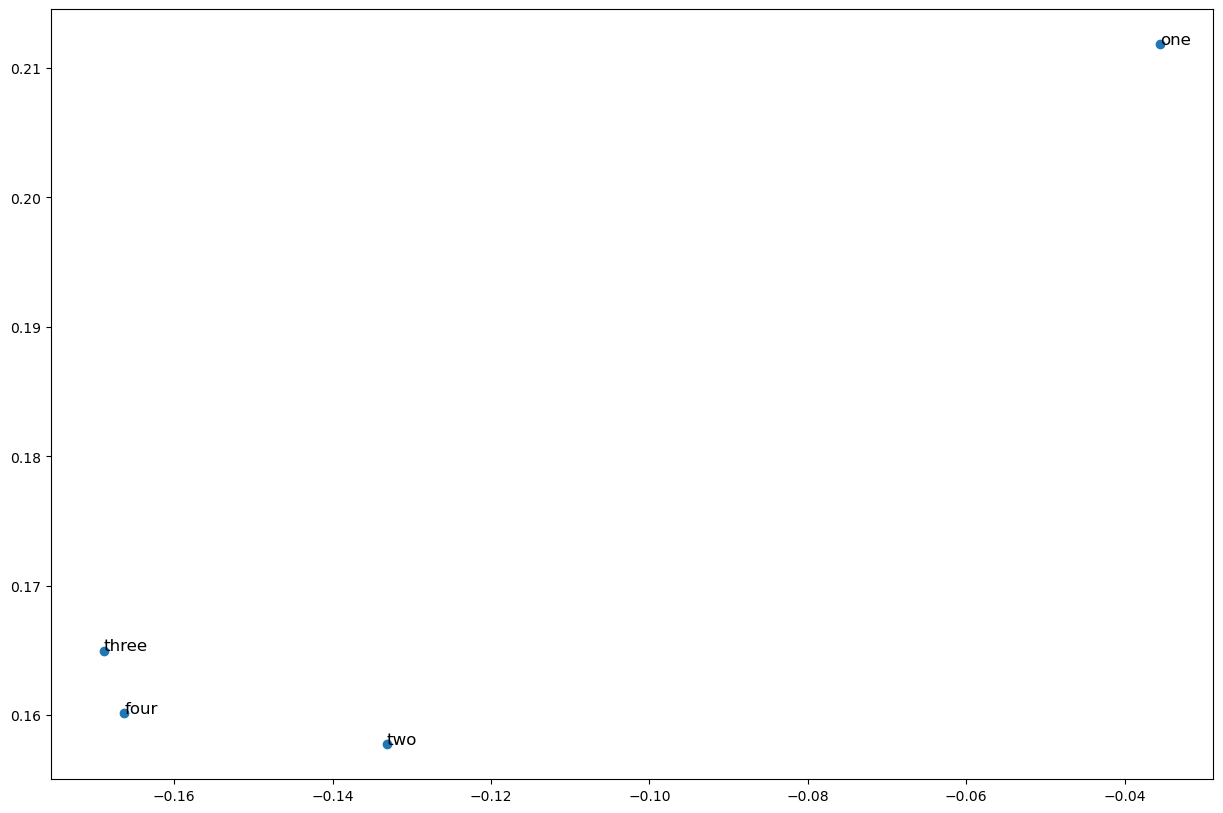

In [103]:
#
# Example of calling visualize_wordvecs...
#
#LoW = "breakfast lunch dinner coffee snake senate".split()     #  cereal python, one two three four five twelve
LoW = "one two three four".split() 
#LoW = "breakfast lunch dinner".split()  
visualize_wordvecs(LoW, m)    

###  hw8pr1 task #4: &nbsp; Your task: &nbsp;&nbsp; Create two more examples...

Using your own choice of words, create two more examples in the spirit of the ones above.

Let's say, at least four words for each. More words welcome!

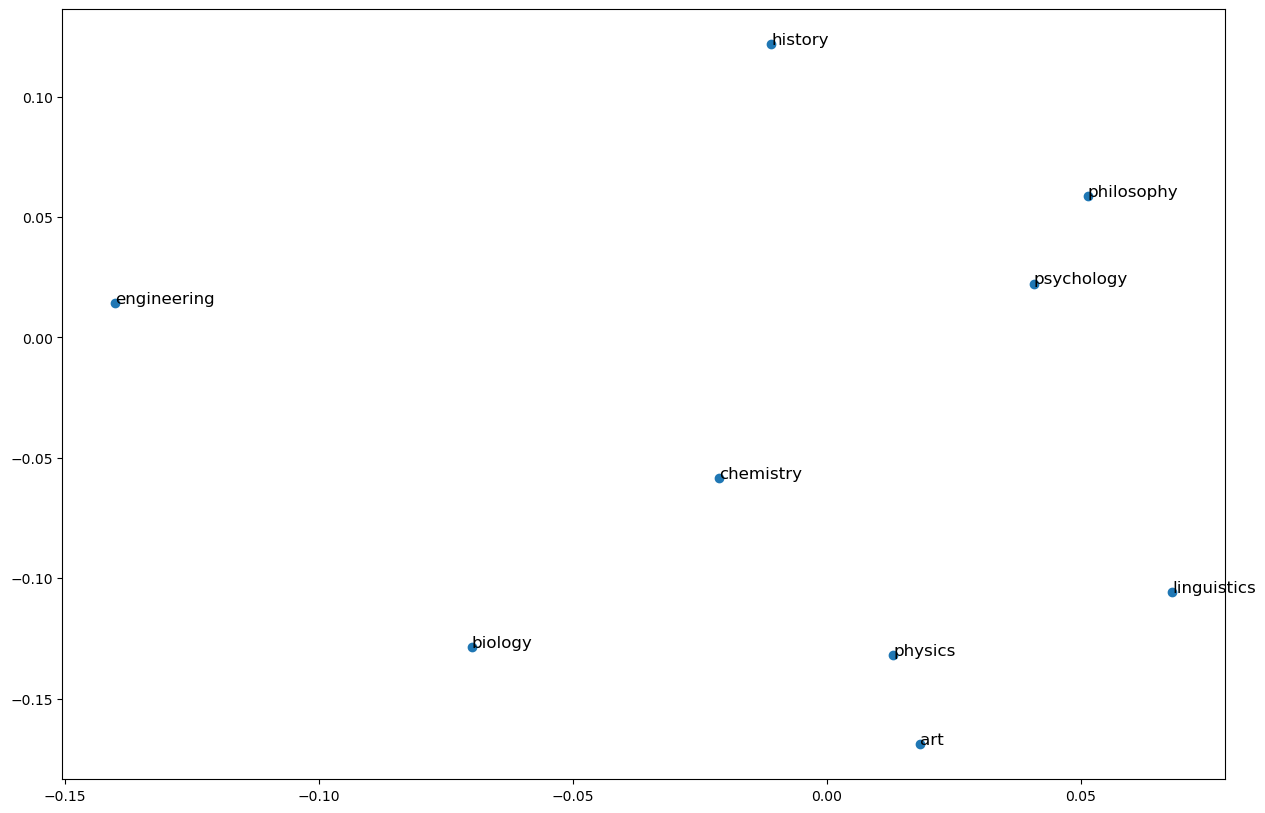

In [106]:
#
# Example of calling visualize_wordvecs...
#
#LoW = "breakfast lunch dinner coffee snake senate".split()     #  cereal python, one two three four five twelve
LoW = "biology chemistry history art physics psychology engineering linguistics philosophy".split() 
#LoW = "breakfast lunch dinner".split()  
visualize_wordvecs(LoW, m)  

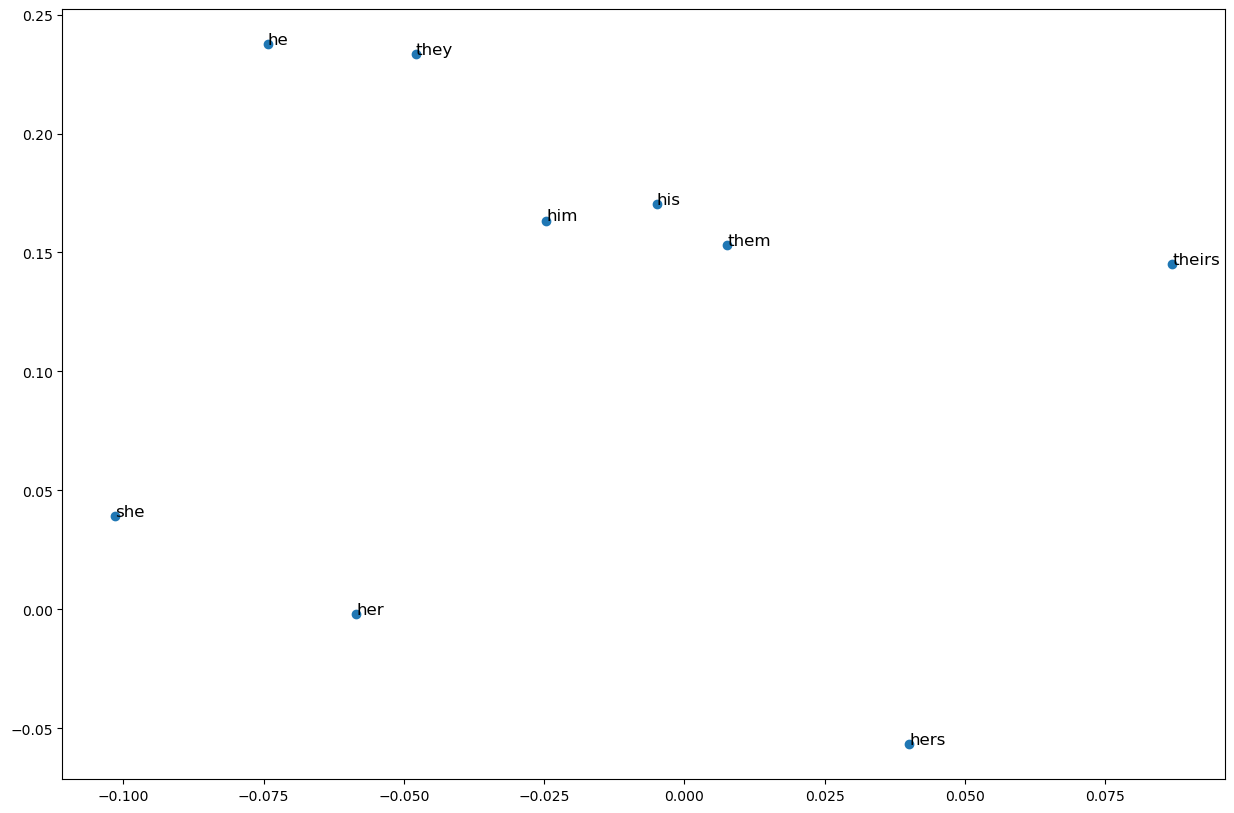

In [108]:
#
# Example of calling visualize_wordvecs...
#
#LoW = "breakfast lunch dinner coffee snake senate".split()     #  cereal python, one two three four five twelve
LoW = "she her hers he him his they them theirs".split() 
#LoW = "breakfast lunch dinner".split()  
visualize_wordvecs(LoW, m)  

<br>

<br>

<hr>

<br>

####  **Optional** &nbsp; Visualizing vocabulary similarities as a heat map

The next cell begins the process of visualizing similarity as a heat map.
+ (optional, ec) &nbsp; The challenge is to expand this into a full 2d visualization of similarities
+ First, for our two sets of words...
  + <tt>Keys = [ 'python', 'ruby', 'r', 'c', 'java', 'coffee' ]</tt> , along with
  + <tt>initial_words = "snake serpent python code ai ml programming".split()</tt>
+ Then, for two more sets of words -- of your own design:

<br>

similarity between python and snake:   0.66
similarity between python and serpent:   0.45
similarity between python and python:   1.00
similarity between python and code:   0.11
  __  ai  __ was not in the vocabulary
similarity between python and ml:   0.08
similarity between python and programming:   0.09
LoS is [0.66062915, 0.44771376, 1.0, 0.10966148, 0.08480783, 0.09035954]
LoW is ['snake', 'serpent', 'python', 'code', 'ml', 'programming']


'Result:'

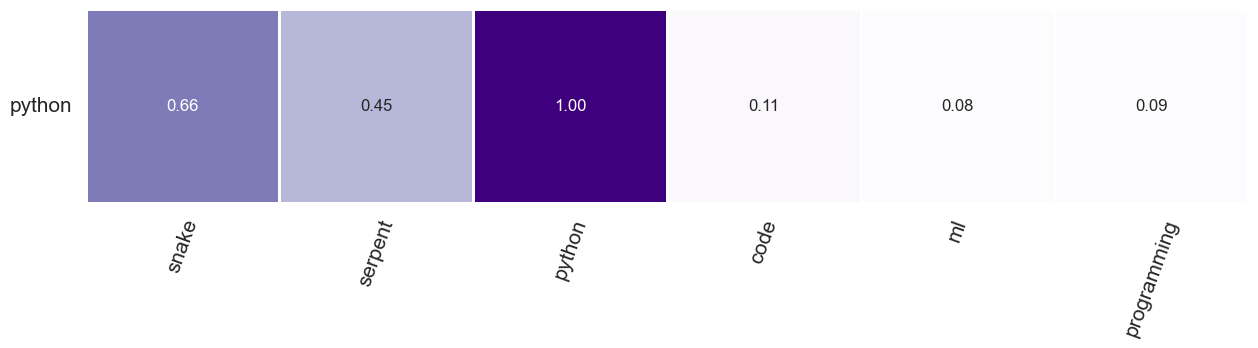

In [109]:
# Starting point for visualizing 2d similarity via a heat map

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# adaptation of the previous similarity-based code
key = 'python'      # this is a _single_ word - the task is to loop over the list, perhaps named Keys
LoS = []
LoW = []
for w in initial_words:
    if w in m:  # is the word, w present in the vocabulary?
        similarity = m.similarity(key,w)
        print(f"similarity between {key} and {w}: {similarity:6.2f}", )
        LoS.append( similarity )
        LoW.append( w )
    else:
        print(f"  __  {w}  __ was not in the vocabulary", )   # not every word will be present

print(f"LoS is {LoS}")
print(f"LoW is {LoW}")

my_data_list = [ LoS ]
my_dataframe = pd.DataFrame(my_data_list, columns=LoW)


# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(15,10))  # (18, 12)
sns.heatmap(data=my_dataframe, annot=True, fmt="4.2f", linewidths=2, yticklabels=["python"], square=True, cmap="Purples", cbar=False, ax=ax)

ylocs, ylabels = plt.yticks()
plt.setp(ylabels, rotation=0, fontsize=15)
xlocs, xlabels = plt.xticks()
plt.setp(xlabels, rotation=70, fontsize=15)
"Result:"

# The goal is to output a square heatmap with all of the similarities plotted...

<br>

### More word-embedding geometry:  Analogies
+ These are an introduction to the analogy problem in hw8 (see the google doc for more detail!)
+ For the moment, we'll keep the examples and explorations in this notebook:

In [110]:
#
# Let's take a look at some additional "geometry" of word-meanings (cool!)
#

m.most_similar(positive='python', topn=10)  # negative='snake'

[('snake', 0.660629153251648),
 ('crocodile', 0.6591363549232483),
 ('alligator', 0.64216548204422),
 ('boa', 0.5617719292640686),
 ('constrictor', 0.5378887057304382),
 ('constrictors', 0.5356364846229553),
 ('snakes', 0.5345131754875183),
 ('anaconda', 0.5207394957542419),
 ('rabbit', 0.5074971318244934),
 ('tortoise', 0.5046288967132568)]

In [111]:
#
# With this most_similar method, we can "subtract" vectors, too:
#

m.most_similar(positive='python', negative='snake', topn=10) 

[('Java', 0.22111037373542786),
 ('Dior', 0.2102828174829483),
 ('Notte', 0.2078552097082138),
 ('os', 0.19944755733013153),
 ('frock', 0.19739562273025513),
 ('blouse', 0.19704443216323853),
 ('plaids', 0.19696447253227234),
 ('blazer', 0.1878664493560791),
 ('gown', 0.17895956337451935),
 ('Gala', 0.17834942042827606)]

In [112]:
#
# Here, see if you can determine the analogy that is being computed using word embeddings:
# 

m.most_similar(positive=['king','woman'], negative=['man'], topn=10) 

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902430415153503),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236843228340149),
 ('queens', 0.5181135535240173),
 ('throne', 0.5005807280540466),
 ('royal', 0.4938204884529114),
 ('ruler', 0.49092739820480347),
 ('princes', 0.481081485748291)]

In [128]:
# 
# This problem is about building and testing analogies...
# 
# This function has a hard-coded set of words, i.e., 'woman', 'king', and 'man'
# Your tasks:
#      + add inputs to the function 
#
def test_most_similar(m, word1, word2, word3, topn):
    """ example of most_similar """
    #print("Testing most_similar on the king - man + woman example...")
    #results = m.most_similar(positive=['woman', 'king'], negative=['man'], topn=10) # topn == # of results
    #results = m.most_similar(positive=['Italy', 'Paris'], negative=['France'], topn=10) # topn == # of results
    results = m.most_similar(positive=[word2, word3], negative = [word1], topn = topn)
    return results

#hard_coded_results = test_most_similar(m)
#hard_coded_results

test_most_similar(m, "man", "king", "woman", 10)

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902430415153503),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236843228340149),
 ('queens', 0.5181135535240173),
 ('throne', 0.5005807280540466),
 ('royal', 0.4938204884529114),
 ('ruler', 0.49092739820480347),
 ('princes', 0.481081485748291)]

###  hw8pr1 task #5: &nbsp; Your task: &nbsp;&nbsp; two _analogy_ functions

#### First, write `generate_analogy(word1, word2, word3, m)`  

Create a function `generate_analogy(word1, word2, word3, m)` that 
+ first checks if all three words, `word1`, `word2`, `word3` are in the model `m`
+ if not, it prints an error warning about this
+ if so, it returns `word4`, where `word1` : `word2` :: `word3` : `word4`
+ (This is using "analogy notation"!)
+ Warning:  the ordering of the words in the most_similar call is DIFFERENT (watch out!)

Be sure to test this on a few examples to find at least one that works well -- and one that does not!

<br>
<hr>
<br>


In [129]:
#
# here is a starting point for generate_analogy:

def generate_analogy(w1, w2, w3, m):
  """ returns word2vec's "answer" for w1:w2 :: w3:?? """
  if w1 not in m:  # example check
    print(f"{w1} was not in the model.")
    return None
  else:
    w4 = test_most_similar(m, w1, w2, w3, 5)[0][0]
    print(w1, ':', w2, '::', w3, ':', w4)
    return w4 

In [130]:
#
# be sure to test -- and show off some of your own that work (and some that don't)
#

generate_analogy("man", "king", "woman", m)  
generate_analogy("Germany", "Berlin", "France", m)  

man : king :: woman : queen
Germany : Berlin :: France : Paris


'Paris'

In [131]:
generate_analogy("morning", "sunrise", "evening", m)

morning : sunrise :: evening : sunset


'sunset'

In [132]:
generate_analogy("hoof", "horse", "paw", m)

hoof : horse :: paw : dog


'dog'

#### Then, write `check_analogy(word1, word2, word3, word4, m)`
+ This should return a "score" on how well the word2vec model `m` does at solving the analogy provided, i.e., 
  + `word1` : `word2` :: `word3` : `word4`
+ that is, it should determine where word4 appears in the top 100 (use topn=100) most-similar words
+ if it _doens't_ appear in the top-100, it should give a score of 0
+ if it _does_ appear, it should give a score between 1 and 100, but
  + a score of 100 means a perfect score. 
  + A score of 1 means that `word4` was the 100th in the list, which is index 99
+ Try it out!   
  + `check_analogy( "man", "king", "woman", "queen", m ) -> 100` <br>
  + `check_analogy( "woman", "man", "bicycle", "fish", m ) -> 0` <br>
  + `check_analogy( "woman", "man", "bicycle", "pedestrian", m ) -> 96` <br>

And, again be sure to find at least four of your own `check_analogy` examples:
  + at least one in the "top quartile" (75% to 100%) 
  + at least one in the "next quartile" (50% to 75%) 
  + at least one in the "next quartile" (25% to 50%) 
  + at least one in the "bottom quartile" (0% to 25%) 

In [154]:
#
# your check_analogy function
#

def check_analogy(w1, w2, w3, w4, m):
    top100 = test_most_similar(m, w1, w2, w3, 100)
    print(top100)
    for i in range(len(top100)):
        if top100[i][0] == w4:
            index = i
            return 100-index 
    return 0

    

In [155]:
#
# and examples from each quartile!
#


check_analogy('hoof', 'horse', 'paw', 'cat', m)

[('dog', 0.5677443742752075), ('puppy', 0.5158308744430542), ('donkey', 0.49722036719322205), ('cat', 0.486232191324234), ('paws', 0.47185856103897095), ('dogs', 0.4653564691543579), ('retriever', 0.45965588092803955), ('horses', 0.45250648260116577), ('steed', 0.44917789101600647), ('kitten', 0.4484805762767792), ('pup', 0.4414510130882263), ('pony', 0.4349379241466522), ('petting', 0.42915064096450806), ('rabbit', 0.42651793360710144), ('monkey', 0.42579951882362366), ('mastiff', 0.4228608012199402), ('animal', 0.41836774349212646), ('feline', 0.41754013299942017), ('Dachshund', 0.4121641516685486), ('collie', 0.41123467683792114), ('Keeshond', 0.4093870520591736), ('pet', 0.406677782535553), ('goat', 0.4064719080924988), ('ponies', 0.4050118923187256), ('petted', 0.40426912903785706), ('terrier', 0.4018388092517853), ('mule', 0.4010775089263916), ('elephant', 0.39223217964172363), ('Horse', 0.3917482793331146), ('hindquarters', 0.39075344800949097), ('rooster', 0.3892778158187866), 

97

In [165]:
check_analogy('grass', 'green', 'ocean', 'blue', m)

[('sea', 0.49092042446136475), ('oceans', 0.45356330275535583), ('tidal', 0.3960365951061249), ('coastal', 0.369064062833786), ('underwater', 0.35496577620506287), ('seas', 0.3517456650733948), ('marine', 0.34571149945259094), ('planet', 0.34125787019729614), ('nautical', 0.3365649878978729), ('solar', 0.335798978805542), ('oceanography', 0.3335869014263153), ('harbor', 0.3302430212497711), ('undersea', 0.3274574875831604), ('polar', 0.32567694783210754), ('energy', 0.32555627822875977), ('cosmos', 0.3239344358444214), ('Imbrium', 0.3238382935523987), ('seafaring', 0.32362034916877747), ('Earth', 0.3231605589389801), ('waters', 0.31614431738853455), ('coastline', 0.3160250782966614), ('carbon', 0.31522613763809204), ('moon', 0.3137251138687134), ('volcanic', 0.3125021159648895), ('shipwreck', 0.3111637532711029), ('Ocean', 0.3096451461315155), ('turquoise', 0.30948296189308167), ('coast', 0.30642351508140564), ('phosphorescent', 0.3054790198802948), ('Mediterranean', 0.3008569777011871

68

In [167]:
check_analogy('smile', 'happy', 'smirk', 'ironic', m)

[('glad', 0.579059362411499), ('unhappy', 0.549878716468811), ('satisfied', 0.5357600450515747), ('disappointed', 0.5341805219650269), ('ecstatic', 0.5158895254135132), ('pleased', 0.5110495686531067), ('annoyed', 0.5028702616691589), ('sorry', 0.4963529706001282), ('thrilled', 0.48302337527275085), ('delighted', 0.47905439138412476), ('happier', 0.4754355847835541), ('displeased', 0.4754129946231842), ('livid', 0.46969524025917053), ('disgusted', 0.4674675464630127), ('okay', 0.46371549367904663), ('surprised', 0.45980820059776306), ('elated', 0.4541238844394684), ('relieved', 0.45223236083984375), ('miffed', 0.4493720233440399), ('proud', 0.4422677457332611), ('confident', 0.440559059381485), ('excited', 0.4339202344417572), ('ambivalent', 0.43117085099220276), ('frustrated', 0.42893728613853455), ('amused', 0.4286961555480957), ('sad', 0.42511940002441406), ('ridiculous', 0.4240763485431671), ('dismayed', 0.4209915101528168), ('concerned', 0.4199734330177307), ('happily', 0.41956853

18

In [164]:
check_analogy('knight', 'castle', 'soldier', 'campground', m)

[('soldiers', 0.5407367944717407), ('barracks', 0.4951167404651642), ('paratroopers', 0.4431999921798706), ('farmhouse', 0.4401969611644745), ('Regiment', 0.4381512403488159), ('Soldier', 0.4200073182582855), ('servicemen', 0.4181774854660034), ('regiment', 0.4127004146575928), ('fort', 0.41015711426734924), ('Marines', 0.4090704917907715), ('blockhouse', 0.4069707691669464), ('Soldiers', 0.4001191556453705), ('troops', 0.39957815408706665), ('house', 0.39781126379966736), ('marines', 0.3937683701515198), ('battalion', 0.3920997679233551), ('prisoner', 0.39080312848091125), ('Army', 0.3900950253009796), ('garrison', 0.38590696454048157), ('villa', 0.38144153356552124), ('palace', 0.38139405846595764), ('airfield', 0.37927377223968506), ('mansion', 0.37620988488197327), ('cemetery', 0.369398832321167), ('airmen', 0.3664645254611969), ('bungalow', 0.3663176894187927), ('cottage', 0.36563771963119507), ('infantrymen', 0.3634335398674011), ('guardhouse', 0.36267730593681335), ('hut', 0.361

41